# Dilan's Travel App

We will use the `Cross Industry Standard Process for Data Mining (CRISP-DM)` to complete this project!

### 1) Business Understanding

Dilan is a world traveler and a solo entrepreneur. He writes a travel blog where he sells info products: a `$8 ` e-book (World Travelers' Best Practices) and a `$80 ` video course (How To Travel the World).

On his blog he has thousands of readers every day, coming from three sources: Reddit, SEO and AdWords.

Dilan writes about his travel experiences covering the 6 main continents of the planet - these are the main categories on the blog.

The business strategy is simple:(1) New readers visit the blog, (2) They read articles, (3) They subscribe to the newsletter,(4)They purchase the info products.

Dilan's travel blog is available in 8 (and only 8) different countries. The marketing budget is not too high at the moment: Dilan spends only $ 1000 a month combined:

`1) Adwords advertisement (~$500 a month for paid ads)`,

`2) SEO($ 250 a month for editing) and`

`3) Reddit (~$250 for content creation)`

`4) And he only has two products!`

He wants to invest more (time, work and money) and that is the reason of this project! 

This analysis aims to adrdress three questions:

`1) What is the startegy for each category based on the number of vistors?`;

`2) In which country should he prioritise his effort and why `;

`3) What will be revenue of Dilan based on the user id of visitors?`.


### 2) Data Understanding


## First-time users: `read_1`

In this table, the first-time accesses are recorded. The fields are the same as described (`date_event`, `time_event`, `event`, `country`, `user_id`, `source`, `topic`), except the original field describing both date and time was divided into separate `date_event` and `time_event` fields.

## Return users: `read_2on`

In this table, the return accesses are recorded. The fields are the same as described (`date_event`, `time_event`, `event`, `country`, `user_id`, `topic`), except the original field describing both date and time was divided into separate `date_event` and `time_event` fields.

## Subscribers: `subscribe`

In this table, the subscription events are recorded. The fields are the same as described (`date_event`, `time_event`, `event`, `user_id`), except the original field describing both date and time was divided into separate `date_event` and `time_event` fields.

## Paid customers: `buy`

In this table, the subscription events are recorded. The fields are the same as described (`date_event`, `time_event`, `event`, `user_id` `price`), except the original field describing both date and time was divided into separate `date_event` and `time_event` fields.

## Importing libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns

## Loading teh datas

In [5]:
#Loading the data
raw_data=pd.read_csv('C:/Users\mfardhossein/Documents/Udacity/Project_1/dilans_data.csv', delimiter = ';',names = ['day_time', 'event_type', 'country', 'user_id','source', 'topic'], parse_dates = ['day_time'])


In [6]:
raw_data.head()

,day_time,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [7]:
#Exploring the tyeps of the data
raw_data.dtypes

day_time      datetime64[ns]
event_type            object
country               object
user_id              float64
source                object
topic                 object
dtype: object

In [8]:
#Exploring the types of the peopel who see Dilans' weblog
raw_data['event_type'].value_counts()

read         581877
buy            8407
subscribe      7618
Name: event_type, dtype: int64

## A graph representing  users who have seen Dilan's blog!

Text(0.5, 1.0, "Users' member")

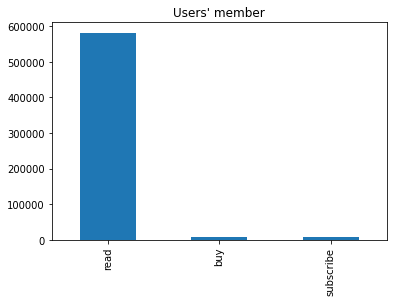

In [9]:
First_analysis= raw_data['event_type'].value_counts().plot(kind="bar")
plt.title("Users' member")

This is stil not fine as we need to count the new readers and the peopel who come back for reading dilan's materials. So we need to find the first readers and ther returning readers!


In [10]:
#Finding all peopel who just read Dilan's materials!
xx=raw_data[raw_data.event_type== 'read']

In [11]:
xx.head()

,day_time,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [12]:
#Removing all potential duplicates in our read data frame
xx.drop_duplicates()

,day_time,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America
...,...,...,...,...,...,...
597897,2018-03-31 04:34:32,read,country_4,2.458361e+09,Africa,NaN
597898,2018-03-31 05:02:06,read,country_6,2.458361e+09,Asia,NaN
597899,2018-03-31 05:02:14,read,country_7,2.458361e+09,North America,NaN
597900,2018-03-31 05:03:53,read,country_7,2.458361e+09,Europe,NaN


## First time readers

In [13]:
read_1_t= xx[(xx['source'].isin(['Reddit', 'AdWords', 'SEO'])) & (xx['topic'].isin(['Africa', 'Europe', 'South America', 'North America', 'Australia', 'Asia']))]
read_1_t.head()

,day_time,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [14]:
read_1_t.shape

(210023, 6)

In [15]:
read_1_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210023 entries, 0 to 597769
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   day_time    210023 non-null  datetime64[ns]
 1   event_type  210023 non-null  object        
 2   country     210023 non-null  object        
 3   user_id     210023 non-null  float64       
 4   source      210023 non-null  object        
 5   topic       210023 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 11.2+ MB


Text(0.5, 1.0, 'Country')

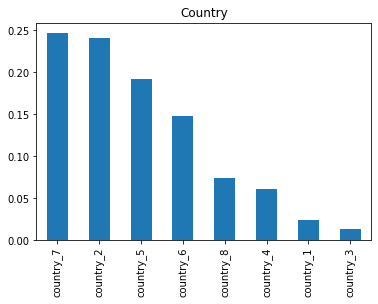

In [16]:
#Highlighting the peopel who read them aterials from different countries
count_types1= read_1_t['country'].value_counts()
(count_types1/read_1_t.shape[0]).plot(kind="bar")
plt.title("Country")

It sounds that peopel from country 7 and 2 come to his weblog for the first time more than others

Text(0.5, 1.0, 'topic')

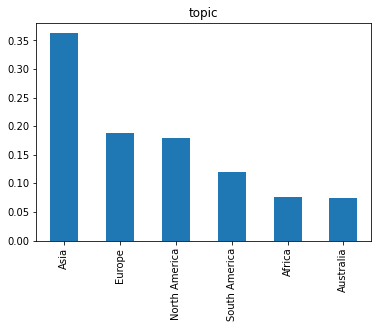

In [17]:
#Highlighting the topic that these pople read
topic_types1= read_1_t['topic'].value_counts()
(topic_types1/read_1_t.shape[0]).plot(kind="bar")
plt.title("topic")

Text(0.5, 1.0, 'source')

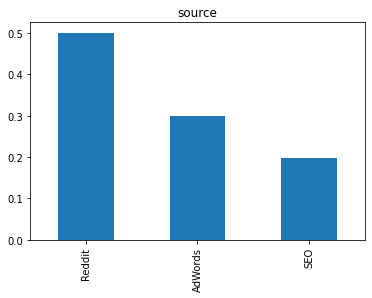

In [18]:
#Highlighting the sources that these pople read
source_types1= read_1_t['source'].value_counts()
(source_types1/read_1_t.shape[0]).plot(kind="bar")
plt.title("source")

## Returning readers

In [19]:
read_2_t= xx[(xx['source'].isin(['Africa', 'Europe', 'South America', 'North America', 'Australia', 'Asia']))]
read_2_t.head()


,day_time,event_type,country,user_id,source,topic
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America,NaN
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia,NaN
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa,NaN
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia,NaN
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America,NaN


In [20]:
read_2_t.shape

(371854, 6)

In [21]:
read_2_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371854 entries, 170 to 597901
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   day_time    371854 non-null  datetime64[ns]
 1   event_type  371854 non-null  object        
 2   country     371854 non-null  object        
 3   user_id     371854 non-null  float64       
 4   source      371854 non-null  object        
 5   topic       0 non-null       object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 19.9+ MB


This Shows that among the 581877 peopel who read Dilans' material for the first time, 321854  returned to read his material more! 

In [22]:
#Checking to see whether the is any null value
read_2_t.isnull().sum()

day_time           0
event_type         0
country            0
user_id            0
source             0
topic         371854
dtype: int64

In [23]:
read_2_t= read_2_t.drop('topic',axis=1)
read_2_t.head()

,day_time,event_type,country,user_id,source
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America


In [24]:
read_2_t.columns = ['day_time', 'event_type','country','user_id','topic']
#read_i_2.rename(columns={"day_time": "day_time", "event_type": "event_type","country": "country", "user_id": "user_id" ,  "source": "topic" })
read_2_t.head()

,day_time,event_type,country,user_id,topic
170,2018-01-01 02:20:18,read,country_5,2.458151e+09,North America
211,2018-01-01 02:53:39,read,country_4,2.458151e+09,Asia
278,2018-01-01 03:34:22,read,country_4,2.458152e+09,Africa
281,2018-01-01 03:36:18,read,country_5,2.458151e+09,Asia
286,2018-01-01 03:40:42,read,country_5,2.458151e+09,South America


In [25]:
#Checking to see whether the is any null value

read_2_t.isnull().sum()

day_time      0
event_type    0
country       0
user_id       0
topic         0
dtype: int64

Text(0.5, 1.0, 'topic')

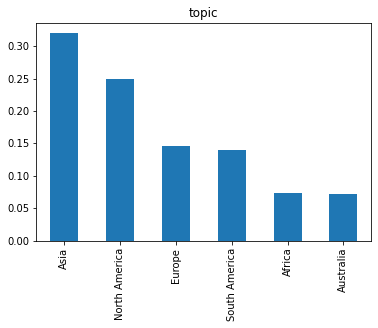

In [26]:
#Which topic is read by the returning readers
topic_types2= read_2_t['topic'].value_counts()
(topic_types2/read_2_t.shape[0]).plot(kind="bar")
plt.title("topic")

Text(0.5, 1.0, 'country')

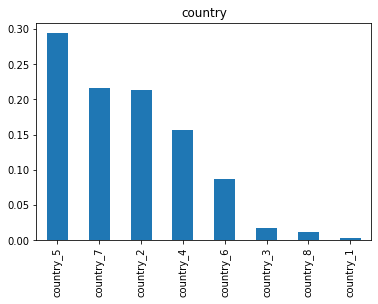

In [27]:
#Highlighting the peopel who read the materials from different countries
country_types2= read_2_t['country'].value_counts()
(country_types2/read_2_t.shape[0]).plot(kind="bar")
plt.title("country")

In [28]:
df_read= pd.concat([read_1_t, read_2_t], ignore_index=False)

In [29]:
df_read.head()

,day_time,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


Text(0.5, 1.0, 'country')

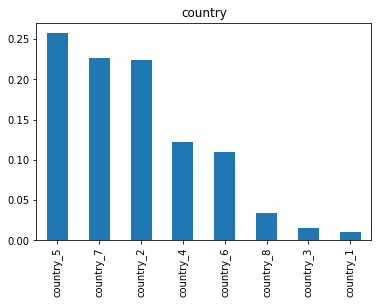

In [30]:
#Highlighting the peopel who read the materials from different countries
country_types3= df_read['country'].value_counts()
(country_types3/df_read.shape[0]).plot(kind="bar")
plt.title("country")

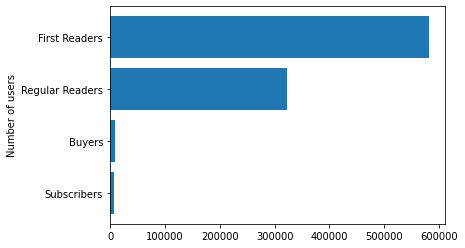

In [31]:
#Finding the situation of the vistors

users_type=["Subscribers","Buyers","Regular Readers", "First Readers" ]
users_count=[7618,8407, 321854,581877]

fig, ax = plt.subplots()
#print(medals.head())
# Plot a bar-chart of gold medals as a function of country
ax.barh(users_type,users_count)

# Set the x-axis tick labels to the country names
#ax.set_xticklabels(medals.index, rotation=90)

# Set the y-axis label
ax.set_ylabel("Number of users")


plt.show()

The above graph indicates the overal number of people who use his weblog in order. As it can seen, more than 500000 people have already visited his weblog;over 350000 peple came back after their first visit, around 8000 people have already bought from his website and around 7000 people subscribe to his blog!

## Subscribers

In [32]:
df_subscribe=raw_data[raw_data.event_type== 'subscribe']

In [33]:
df_subscribe=df_subscribe.drop(['user_id','source','topic'],axis=1)

In [34]:
df_subscribe.columns = ['day_time', 'event_type','user_id']
#read_i_2.rename(columns={"day_time": "day_time", "event_type": "event_type","country": "country", "user_id": "user_id" ,  "source": "topic" })
df_subscribe.head()

,day_time,event_type,user_id
10,2018-01-01 00:07:41,subscribe,2458151268
11,2018-01-01 00:07:44,subscribe,2458151267
53,2018-01-01 00:40:55,subscribe,2458151309
101,2018-01-01 01:26:26,subscribe,2458151358
105,2018-01-01 01:30:39,subscribe,2458151361


In [35]:
#Checking the types of the features
df_subscribe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7618 entries, 10 to 597717
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   day_time    7618 non-null   datetime64[ns]
 1   event_type  7618 non-null   object        
 2   user_id     7618 non-null   object        
dtypes: datetime64[ns](1), object(2)
memory usage: 238.1+ KB


In [36]:
#Turning the userid to float
df_subscribe['user_id'] = df_subscribe['user_id'].astype(float)
df_subscribe.dtypes

day_time      datetime64[ns]
event_type            object
user_id              float64
dtype: object

## Buyers

In [37]:
df_buy= raw_data[raw_data.event_type== 'buy']

In [38]:
df_buy=df_buy.drop(['source','topic'],axis=1)

In [39]:
df_buy.columns = ['day_time', 'event_type','user_id','price']
#read_i_2.rename(columns={"day_time": "day_time", "event_type": "event_type","country": "country", "user_id": "user_id" ,  "source": "topic" })
df_buy.head()

,day_time,event_type,user_id,price
320,2018-01-01 04:04:59,buy,2458151555,8.0
745,2018-01-01 09:28:00,buy,2458151933,8.0
1073,2018-01-01 13:23:16,buy,2458152245,8.0
1150,2018-01-01 14:20:43,buy,2458152315,8.0
1351,2018-01-01 16:56:04,buy,2458152371,8.0


In [40]:
#Checking the types of the features
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8407 entries, 320 to 597750
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   day_time    8407 non-null   datetime64[ns]
 1   event_type  8407 non-null   object        
 2   user_id     8407 non-null   object        
 3   price       8407 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 328.4+ KB


In [41]:
#Turning the userid to float
df_buy['user_id'] = df_buy['user_id'].astype(float)
df_buy.dtypes

day_time      datetime64[ns]
event_type            object
user_id              float64
price                float64
dtype: object

Text(0.5, 1.0, 'Price')

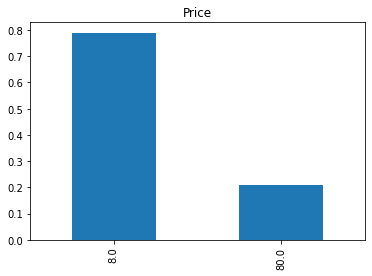

In [42]:
#Highlighting the prices of Dilans' products

price_types= df_buy['price'].value_counts()
(price_types/df_buy.shape[0]).plot(kind="bar")
plt.title("Price")

So far we explored Dilan's data, evaluated teh number of first readers, rgular readers, subscribers and buyers. Also, we found that from which countries are the vistors, what are their sources,a nd what is the popular topics. However, since our duty is to help Dilan with investment, we need to find teh relationship between these factors and the revenue. To this end, new tables should be created: 

## The relationship between Revenue and Countries

### Revenue by country

The revenue by country will be calculated as follows. We'll generate a table listing the `user_id`, the `country`s that each user read, and the revenue generated by that user. The revenue will be divided by the number of countries of each user , and then added up by number of countries.

In [43]:
#Sumarizing the first readers' table
read_1= read_1_t[['user_id','country']]

In [44]:
read_1.head()

,user_id,country
0,2.458151e+09,country_7
1,2.458151e+09,country_7
2,2.458151e+09,country_7
3,2.458151e+09,country_7
4,2.458151e+09,country_8


In [45]:
#Sumarizing the regular readers' table
read_2= read_2_t[['user_id','country']]

In [46]:
read_2.head()

,user_id,country
170,2.458151e+09,country_5
211,2.458151e+09,country_4
278,2.458152e+09,country_4
281,2.458151e+09,country_5
286,2.458151e+09,country_5


In [47]:
#Concatinating the two readers table
read_1_2= pd.concat([read_1, read_2], ignore_index=False)

In [48]:
read_1_2.head()

,user_id,country
0,2.458151e+09,country_7
1,2.458151e+09,country_7
2,2.458151e+09,country_7
3,2.458151e+09,country_7
4,2.458151e+09,country_8


In [49]:
#Grouping the buy table based on  the visitors user id and the summation of their purchases and call it as buy_1_2
buy_1_2=df_buy.groupby('user_id')['price'].sum().reset_index()

In [50]:
buy_1_2.columns=['user_id','revenue_total']

In [51]:
buy_1_2.head()

,user_id,revenue_total
0,2.458151e+09,88.0
1,2.458151e+09,8.0
2,2.458151e+09,8.0
3,2.458151e+09,8.0
4,2.458151e+09,8.0


In [52]:
#Grouping the main readers table based on the  visitors user id and their countries and call it as read_1_2_con
read_1_2_con= read_1_2.groupby('user_id')['country'].count().to_frame().reset_index()

In [53]:
read_1_2_con.head()

,user_id,country
0,2.458151e+09,1
1,2.458151e+09,1
2,2.458151e+09,1
3,2.458151e+09,1
4,2.458151e+09,1


In [54]:
#read_1_2_con['country'].value_counts()

In [55]:
read_1_2_con.columns=['user_id','read_cnt_userid']

In [56]:
read_1_2_con.head()

,user_id,read_cnt_userid
0,2.458151e+09,1
1,2.458151e+09,1
2,2.458151e+09,1
3,2.458151e+09,1
4,2.458151e+09,1


Creating a table based on the visitors user ID and the amount of their purchases including counting the visitors' country

In [57]:
#Joining the buy_1_2 table with the read_1_2_con to get the revenue_country table and call it as joining
joining= read_1_2.merge(buy_1_2, how='inner', on='user_id' ).merge(read_1_2_con, how='inner', on='user_id' )

In [58]:
joining.head()

,user_id,country,revenue_total,read_cnt_userid
0,2.458151e+09,country_4,88.0,12
1,2.458151e+09,country_4,88.0,12
2,2.458151e+09,country_4,88.0,12
3,2.458151e+09,country_4,88.0,12
4,2.458151e+09,country_4,88.0,12


In [59]:
#Finding the Dilan's revenue per article for each country
joining['revenue_article'] = joining['revenue_total']/joining['read_cnt_userid']

In [60]:
joining.head()

,user_id,country,revenue_total,read_cnt_userid,revenue_article
0,2.458151e+09,country_4,88.0,12,7.333333
1,2.458151e+09,country_4,88.0,12,7.333333
2,2.458151e+09,country_4,88.0,12,7.333333
3,2.458151e+09,country_4,88.0,12,7.333333
4,2.458151e+09,country_4,88.0,12,7.333333


In [61]:
#Finding the Dilan's revenue per country taht Dillan might get
joining.groupby('country')['revenue_article'].sum().to_frame().reset_index()

,country,revenue_article
0,country_1,920.0
1,country_2,39528.0
2,country_3,3616.0
3,country_4,33464.0
4,country_5,57920.0
5,country_6,16432.0
6,country_7,39760.0
7,country_8,2840.0


In [62]:
joining_sum= joining.groupby('country')['revenue_article'].sum().to_frame().reset_index()

c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


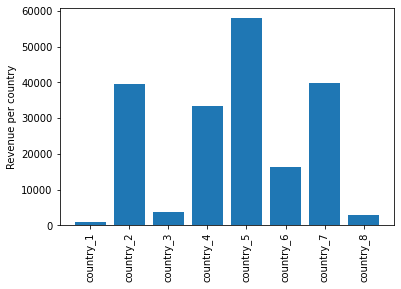

In [63]:
fig, ax = plt.subplots()
#print(medals.head())
# Plot a bar-chart of gold medals as a function of country
ax.bar(joining_sum['country'],joining_sum['revenue_article'])

# Set the x-axis tick labels to the country names
ax.set_xticklabels(joining_sum['country'], rotation=90)

# Set the y-axis label
ax.set_ylabel("Revenue per country")


plt.show()

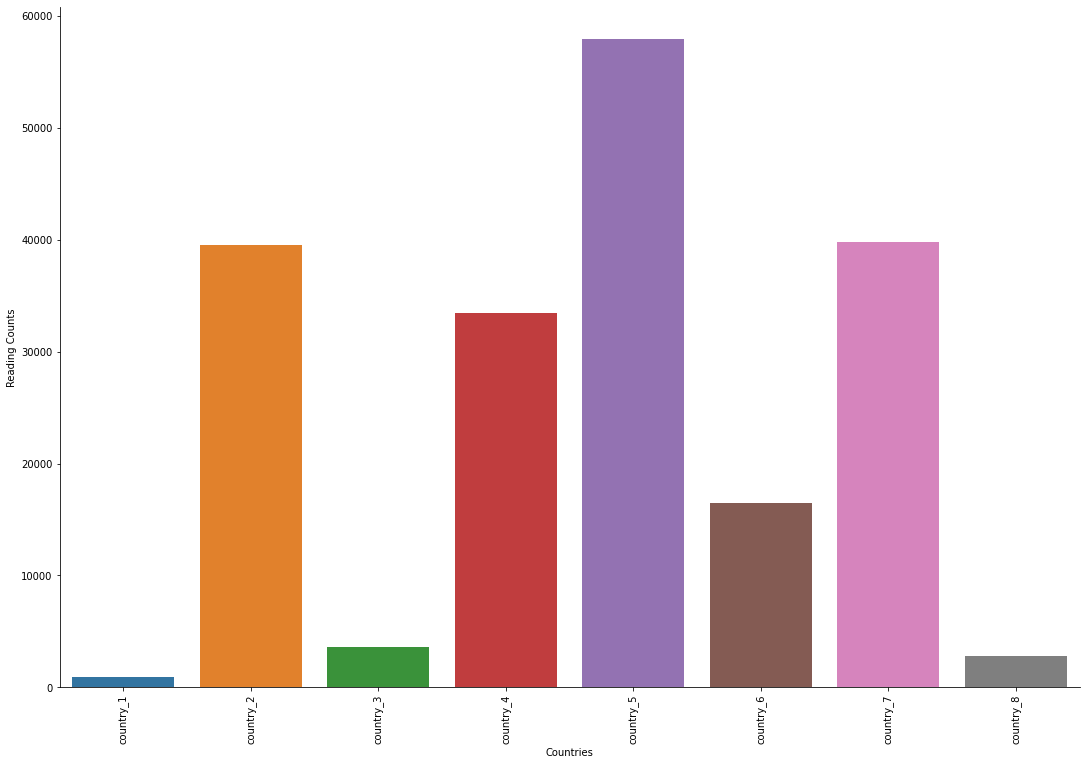

In [64]:
g=sns.catplot(x="country",y="revenue_article",data=joining_sum,kind='bar',height=10, aspect=15/10)
g.set_xticklabels(rotation=90)
g.set(xlabel='Countries', ylabel='Reading Counts')
plt.show()

## Purchase behavior modeling

Now we'll look at the relationship between the subscription numbers and the purchase numbers. We'll try to model the purchase behaviour using as input a few features of our users:
- number of days without purchase
- number of days since last activity (read, subscribe or purchase)
- number of articles read
- whether the user has subscribed to DTG's content or not

Right from the outset we expect that the number of days without purchase and the number of articles read will be somewhat correlated; specifically, more days without purchase is expected to be positively correlated with the number of articles read. If that is the case, we will need to take action to improve the model.

### 3) Data Preparation

In [65]:
df_read.head()

,day_time,event_type,country,user_id,source,topic
0,2018-01-01 00:01:01,read,country_7,2.458151e+09,SEO,North America
1,2018-01-01 00:03:20,read,country_7,2.458151e+09,SEO,South America
2,2018-01-01 00:04:01,read,country_7,2.458151e+09,AdWords,Africa
3,2018-01-01 00:04:02,read,country_7,2.458151e+09,AdWords,Europe
4,2018-01-01 00:05:03,read,country_8,2.458151e+09,Reddit,North America


In [66]:
#Sumarizing the first readers tabel
df_read_1= read_1_t[['day_time','event_type','user_id']]

In [67]:
#Sumarizing the regular readers tabel
df_read_2= read_2_t[['day_time','event_type','user_id']]

In [68]:
#read table
df_read_1_2= pd.concat([df_read_1, df_read_2], ignore_index=False)

In [69]:
df_read_1_2.head()

,day_time,event_type,user_id
0,2018-01-01 00:01:01,read,2.458151e+09
1,2018-01-01 00:03:20,read,2.458151e+09
2,2018-01-01 00:04:01,read,2.458151e+09
3,2018-01-01 00:04:02,read,2.458151e+09
4,2018-01-01 00:05:03,read,2.458151e+09


In [70]:
read_info= df_read_1_2.groupby('user_id').agg({'day_time': ['min', 'max'], 'user_id': 'count'}).reset_index()

In [71]:
read_info.columns= ['user_id','read_first', 'read_last', 'read_count']

In [72]:
read_info.head()

,user_id,read_first,read_last,read_count
0,2.458151e+09,2018-01-01 00:01:01,2018-01-01 00:01:01,1
1,2.458151e+09,2018-01-01 00:03:20,2018-01-01 00:03:20,1
2,2.458151e+09,2018-01-01 00:04:01,2018-01-01 00:04:01,1
3,2.458151e+09,2018-01-01 00:04:02,2018-01-01 00:04:02,1
4,2.458151e+09,2018-01-01 00:05:03,2018-01-01 00:05:03,1


In [73]:
buy_info=df_buy.groupby('user_id').agg({'day_time': ['min', 'max'], 'price': 'sum'}).reset_index()

In [74]:
buy_info.columns= ['buy_uid','first_purchase', 'last_purchase', 'revenue']

In [75]:
buy_info.head()

,buy_uid,first_purchase,last_purchase,revenue
0,2.458151e+09,2018-01-04 00:50:27,2018-01-05 10:23:05,88.0
1,2.458151e+09,2018-01-10 02:09:21,2018-01-10 02:09:21,8.0
2,2.458151e+09,2018-02-24 18:22:05,2018-02-24 18:22:05,8.0
3,2.458151e+09,2018-01-22 08:09:06,2018-01-22 08:09:06,8.0
4,2.458151e+09,2018-01-26 09:02:07,2018-01-26 09:02:07,8.0


In [76]:
subscribe_info= df_subscribe[['user_id','day_time' ]]

In [77]:
subscribe_info.columns= ['sub_uid','subscribe_date']

In [78]:
subscribe_info.head()

,sub_uid,subscribe_date
10,2.458151e+09,2018-01-01 00:07:41
11,2.458151e+09,2018-01-01 00:07:44
53,2.458151e+09,2018-01-01 00:40:55
101,2.458151e+09,2018-01-01 01:26:26
105,2.458151e+09,2018-01-01 01:30:39


In [79]:
df_reg=read_info.merge(subscribe_info, how='left', left_on= 'user_id', right_on='sub_uid').merge(buy_info, how='left', left_on= 'user_id', right_on='buy_uid')

In [80]:
df_reg.head()

,user_id,read_first,read_last,read_count,sub_uid,subscribe_date,buy_uid,first_purchase,last_purchase,revenue
0,2.458151e+09,2018-01-01 00:01:01,2018-01-01 00:01:01,1,NaN,NaT,NaN,NaT,NaT,NaN
1,2.458151e+09,2018-01-01 00:03:20,2018-01-01 00:03:20,1,NaN,NaT,NaN,NaT,NaT,NaN
2,2.458151e+09,2018-01-01 00:04:01,2018-01-01 00:04:01,1,NaN,NaT,NaN,NaT,NaT,NaN
3,2.458151e+09,2018-01-01 00:04:02,2018-01-01 00:04:02,1,NaN,NaT,NaN,NaT,NaT,NaN
4,2.458151e+09,2018-01-01 00:05:03,2018-01-01 00:05:03,1,NaN,NaT,NaN,NaT,NaT,NaN


In [81]:
df_reg.set_index(keys='user_id', drop=True, inplace=True)

In [82]:
df_reg.sample(10)

,read_first,read_last,read_count,sub_uid,subscribe_date,buy_uid,first_purchase,last_purchase,revenue
user_id,,,,,,,,,
2.458321e+09,2018-03-17 09:48:25,2018-03-17 09:48:25,1,NaN,NaT,NaN,NaT,NaT,NaN
2.458274e+09,2018-02-27 14:40:09,2018-02-27 14:40:09,1,NaN,NaT,NaN,NaT,NaT,NaN
2.458211e+09,2018-01-30 23:21:10,2018-02-17 06:03:43,6,NaN,NaT,NaN,NaT,NaT,NaN
2.458278e+09,2018-03-01 02:07:38,2018-03-01 02:07:38,1,NaN,NaT,NaN,NaT,NaT,NaN
2.458209e+09,2018-01-30 05:05:49,2018-01-30 05:05:49,1,NaN,NaT,NaN,NaT,NaT,NaN
2.458242e+09,2018-02-14 08:58:05,2018-02-14 08:58:05,1,NaN,NaT,NaN,NaT,NaT,NaN
2.458352e+09,2018-03-27 19:50:17,2018-03-28 01:35:17,2,NaN,NaT,NaN,NaT,NaT,NaN
2.458232e+09,2018-02-09 18:45:35,2018-02-17 22:43:51,17,2.458232e+09,2018-02-16 03:59:05,2.458232e+09,2018-02-13 08:22:43,2018-02-13 08:22:43,8.0
2.458253e+09,2018-02-19 00:30:02,2018-02-19 00:30:02,1,NaN,NaT,NaN,NaT,NaT,NaN


Now that we have the data, let's wrangle it into a format the regression engine will understand. 

#### Number of articles read vs. revenue 

This is the most obvious clue that DTG's customers are interested in buying it's products. Let's see what the relationship looks like. 

First, extract the necessary parameters:

In [91]:
x_log = df_reg['read_count']

### Missing data
Here we have many NA in the revenue column which we will turn all them to 0 

In [92]:
#Handling missing data in the y axis
y_log = df_reg['revenue'].fillna(0).astype(int)

c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  


<AxesSubplot:xlabel='read_count', ylabel='revenue'>

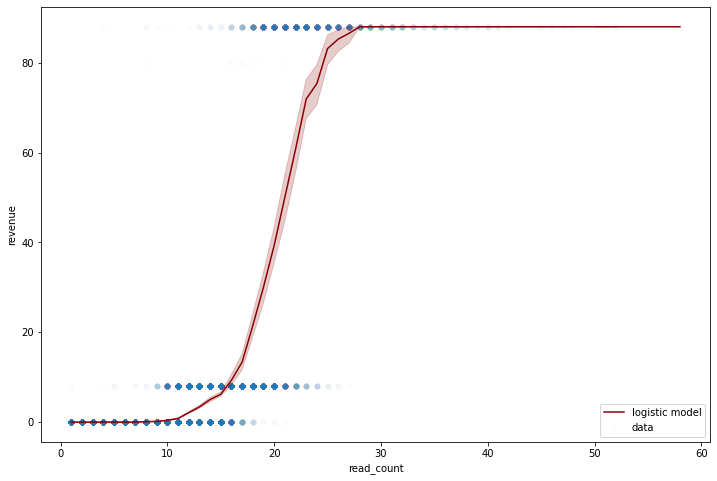

In [84]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_axes()
sns.scatterplot(x=x_log, y=y_log, ax=ax, label='data', alpha=0.01)
#ax2 = plt.subplot(122)
sns.lineplot(x=x_log, y=y_log, ax=ax, label = 'logistic model', color = 'darkred')

From the graph above, we can extract a few conclusions:

1. There are only 4 possible values for the amount spent: \\$0, \\$8, \\$80 and \\$88;
2. Not many people spend \\$80;
2. This relationship looks roughly logistic in nature. Let's see how the logistic model performs.

### 4) Modeling

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_validate as cv

spent_values = y_log.astype('category').cat.categories

X_train, X_test, y_train, y_test = tts(x_log.values.reshape(-1,1), y_log.values, test_size = 0.2)

mdl_log = LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial')
mdl_log.fit(X_train, y_train)

models = {
    'log-1d': {
        'model': mdl_log,
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }
}

### 5) Evaluation

Let's run a quick test to see how the fitted model performs against a dataset it didn't see before:

In [86]:
from sklearn.metrics import balanced_accuracy_score

# create a k-fold croos validation iterator of k=5 folds
kf = 5

scores_r2_test = cv(mdl_log, X_test, y_test, cv = kf)
scores_ba_test = cv(mdl_log, X_test, y_test, cv = kf, scoring='balanced_accuracy')
mean_scores_r2 = np.mean(scores_r2_test['test_score'])
mean_scores_ba = np.mean(scores_ba_test['test_score'])
print(f'Average R-squared using {kf:n}-fold crossvalidation on test data: {mean_scores_r2:.3%}')
print(f'Average balanced accuracy using {kf:n}-fold crossvalidation on test data: {mean_scores_ba:.3%}')

c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
c:\users\mfardhossein\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Average R-squared using 5-fold crossvalidation on test data: 98.434%
Average balanced accuracy using 5-fold crossvalidation on test data: 66.661%


### 6) Deployment

Quite well, aparently! Let's try and fit this model to all the users who are not yet customers to see if any of them look like potential buyers:

In [87]:
non_buyers_x = df_reg[pd.isnull(df_reg['buy_uid'])]['read_count']
preds = mdl_log.predict_proba(non_buyers_x.values.reshape(-1,1))
spent_values.name = 'probability of spending...'
#df_pred = pd.DataFrame(preds, columns = list(map('spend_${:n}'.format, spent_values)), index=non_buyers_x.index)
df_pred = pd.DataFrame(preds, columns = spent_values, index=non_buyers_x.index)
df_pred['expected_revenue'] = np.dot(df_pred.filter(regex='.*[0-9]+'), spent_values)

In [88]:
def display_pred(df_pred):
    '''
    input: a dataframe
    Output: display all the userid individuals and their predicted amount of spending. the function represent teh proability that a
    an individual could spend either 0 or 8 or 80 or 88$ and the overal expected revenue(here we filter the amount and put it in a clean format)
    '''
    df_pred_disp = pd.DataFrame([], columns = df_pred.columns)
    for col in df_pred.filter(regex='[0-9]*'):
        df_pred_disp[col] = df_pred[col].map('{:.2%}'.format)
    for col in df_pred.filter(regex='.*revenue.*'):
        df_pred_disp[col] = df_pred[col].map('${:,.2f}'.format)
    
    display(df_pred_disp)
    del df_pred_disp
    
display_pred(df_pred[df_pred[0] < 0.5].sort_values(by='expected_revenue', ascending=False))

print('Expected revenue from users who are predicted to spend money: ${:.2f}'.format(df_pred[df_pred[0] < 0.5]['expected_revenue'].sum()))
print('Total expected revenue from all users who are not buyers: ${:.2f}'.format(df_pred['expected_revenue'].sum()))

probability of spending...,0,8,80,88,expected_revenue
user_id,,,,,
2.458259e+09,0.13%,46.64%,0.13%,53.10%,$50.56
2.458247e+09,0.13%,46.64%,0.13%,53.10%,$50.56
2.458307e+09,0.40%,61.23%,0.14%,38.22%,$38.65
2.458174e+09,0.40%,61.23%,0.14%,38.22%,$38.65
2.458202e+09,0.40%,61.23%,0.14%,38.22%,$38.65
...,...,...,...,...,...
2.458205e+09,45.35%,53.70%,0.05%,0.91%,$5.13
2.458270e+09,45.35%,53.70%,0.05%,0.91%,$5.13
2.458206e+09,45.35%,53.70%,0.05%,0.91%,$5.13


Expected revenue from users who are predicted to spend money: $7740.84
Total expected revenue from all users who are not buyers: $15742.43


Looks like there are quite a few potential buyers who are more likely to buy than to not buy. These potential buyers are ordered by expected revenue, so you can target whatever amount of users you can afford.